In [112]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from io import BytesIO
import os

In [113]:
def check_for_csv_files(path):
    csv_files = [file for file in os.listdir(path) if file.endswith(('.csv'))]
    return csv_files

base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout'

#directory_to_check = os.path.join(base_dir, r'\bic_HA')

csv_files = check_for_csv_files(base_dir)

In [101]:

def read_files(base_dir):
    data = []
  
    for file in sorted(os.listdir(base_dir)):
        full_path = os.path.join(base_dir, file)
        if os.path.isfile(full_path):
            df = pd.read_csv(full_path)
            data.append(df)
    return data
    
def process_data(data):
    combined_values = []
    conditions = []
    for i, df in enumerate(data):
        # Calculating average of row sums and total column sum, then averaging these two
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)

        if i < 3:
            condition = 'HCO3 - Cys'
        elif i < 6:
            condition = 'HCO3 + Cys'
        elif i < 9:
            condition = 'NaOH - Cys'
        else:
            condition = 'NaOH + Cys'
        conditions.append(condition)
    
    return combined_values, conditions

def plot_data(combined_values, conditions):
    unique_conditions = sorted(set(conditions))
    markers = ['o', '^', 's', 'p']  
    colors = ['blue', 'green', 'red', 'purple']  

plt.figure(figsize=(10, 6))
for value, condition in zip(combined_values, conditions):
        idx = unique_conditions.index(condition)
        plt.errorbar(unique_conditions.index(condition), value,
                     fmt=markers[idx], color=colors[idx], markersize=10,
                     label=condition if condition not in plt.gca().get_legend_handles_labels()[1] else "")
plt.title('Estimated Spikes / Well Washout', fontweight='bold', fontsize=14)
plt.xlabel('Metric', fontweight='bold', fontsize=12)
plt.ylabel('Values', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Example usage
base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout'
data = read_files(base_dir)
results = process_data(data)
plot_data(results)

NameError: name 'unique_conditions' is not defined

<Figure size 1000x600 with 0 Axes>

In [106]:
df

,Condition,Mean Value,STD
0,NaOH - Cys,40.577794,67.658622


In [ ]:
file_names = [
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_4.csv',
    
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_4.csv',
    
    'bicarbonate_acute/predictions_deltaF_bic_ncys_4.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_1.csv',

    'bicarbonate_acute/predictions_deltaF_bic_cys_1.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_4.csv',

]

In [114]:
#Estimated Total Spikes per Well, sum of rows and frames (sum all prediction values)
#Graph 1

def read_files(csv_files, base_dir):
    data = []
    for file in csv_files:
        full_path = os.path.join(base_dir, file)
        if os.path.exists(full_path):  # Check if the file exists
            df = pd.read_csv(full_path)
            data.append(df)
            print(f"Read file: {file}") 
        else:
            print(f"File not found: {file}") 
    return data

def process_data(data):
    combined_values = []
    values_by_condition = {'NaOH - Cys': [], 'NaOH + Cys': [], 'HCO3 - Cys': [], 'HCO3 + Cys': []}

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)

        if i < 4:
            condition = 'NaOH - Cys'
        elif i < 8:
            condition = 'NaOH + Cys'
        elif i < 12:
            condition = 'HCO3 - Cys'
        else:
            condition = 'HCO3 + Cys'
        values_by_condition[condition].append(combined_value)

    means = {}
    stds = {}
    for condition, values in values_by_condition.items():
        means[condition] = np.mean(values)
        stds[condition] = np.std(values, ddof=1)
        return means, stds

#means, stds = process_data(data)

def create_scatter_plot(data):
    """Create a scatter plot using the process_data function to generate means and std dev."""
    means, stds = process_data(data)

    data = {'Condition': [], 'Mean Value': [], 'STD': []}
    for condition, value in means.items():
        data['Condition'].append(condition)
        data['Mean Value'].append(value)
        data['STD'].append(stds[condition])

    df = pd.DataFrame(data)

    markers = {'NaOH - Cys': 'o', 'NaOH + Cys': '^', 'HCO3 - Cys': 's', 'HCO3 + Cys': 'p'}
    colors = {'NaOH - Cys': 'blue', 'NaOH + Cys': 'green', 'HCO3 - Cys': 'red', 'HCO3 + Cys': 'purple'}

plt.figure(figsize=(10, 6))

handled_labels = []
for index, row in df.iterrows():
        # Ensure every condition uses its defined marker and color
        marker = markers[row['Condition']]
        color = colors[row['Condition']]
        label = row['Condition']

        # Check if label has already been added to the legend
        if label in handled_labels:
            label = None
        else:
            handled_labels.append(label)

        plt.errorbar(index, row['Mean Value'], yerr=row['STD'],
                     fmt=marker, color=color, markersize=10,
                     capsize=5, label=label)

plt.title('Estimated Spikes / Well Washout', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Total Spikes / (min-1)', fontweight='bold', fontsize=18)
plt.xticks(range(len(df)), df['Condition'], fontweight='bold', fontsize=12)  # Set x-tick labels to condition names
plt.yticks(fontweight='bold', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

#data = read_files(csv_files, base_dir)
means, stds = process_data(data)
create_scatter_plot(means, stds)

NameError: name 'markers' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
def create_boxplot(combined_values, conditions):
    data = {'Condition': conditions, 'Value': combined_values}
    df = pd.DataFrame(data)
    sns.boxplot(x='Condition', y='Value', data=df, linewidth=2)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
    means = df.groupby('Condition')['Value'].mean().reset_index()
    plt.title('Estimated Spikes Total per Well Acute', fontweight='bold', fontsize=18)
    plt.xlabel('Condition', fontweight='bold', fontsize=18)
    plt.ylabel('Estimated Spikes / Well (min-1)', fontweight='bold', fontsize=18)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=18)
    plt.ylim([0, 8000])
    plt.show()
create_boxplot(combined_values, conditions)

In [32]:
#CV_ISF per Well

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/prediction_df_high pH_Well3.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\prediction_exp_pre_high_well007.csv')
data3 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_exp_pre_high__well011.csv')

data4 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well003.csv')
data5 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well007.csv')
data6 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well011.csv')

# Calculate the sum of each row and divide by the number of non-NaN rows
row_sum1 = data.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum2 = data2.sum(axis=1).mean()
row_sum3 = data3.sum(axis=1).mean()
row_sum4 = data4.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum5 = data5.sum(axis=1).mean()
row_sum6 = data6.sum(axis=1).mean()

# Number of rows with values for each dataset
num_rows_data = 104
num_rows_data2 = 156
num_rows_data3 = 74
num_rows_data4 = 104
num_rows_data5 = 156
num_rows_data6 = 74

# Calculate the sum of each row and divide by the number of rows with values
row_sum1_div_rows = data.sum(axis=1).sum() / num_rows_data  # Sum each row, sum these and then divide by the number of rows with values
row_sum2_div_rows = data2.sum(axis=1).sum() / num_rows_data2
row_sum3_div_rows = data3.sum(axis=1).sum() / num_rows_data3
row_sum4_div_rows = data4.sum(axis=1).sum() / num_rows_data4  
row_sum5_div_rows = data5.sum(axis=1).sum() / num_rows_data5
row_sum6_div_rows = data6.sum(axis=1).sum() / num_rows_data6

# Calculate the overall average of each DataFrame
overall_average1 = data.mean().mean()  # Calculate the mean of each column, then the mean of those means
overall_average2 = data2.mean().mean()
overall_average3 = data3.mean().mean()
overall_average4 = data4.mean().mean()  
overall_average5 = data5.mean().mean()
overall_average6 = data6.mean().mean()

# Divide the average row sum by the overall average for each dataset
cv1 = row_sum1_div_rows / overall_average1
cv2 = row_sum2_div_rows / overall_average2
cv3 = row_sum3_div_rows / overall_average3
cv4 = row_sum1_div_rows / overall_average4
cv5 = row_sum2_div_rows / overall_average5
cv6 = row_sum3_div_rows / overall_average6


# Create a DataFrame with your data
data = {
    'Condition': ['pre_high_pH', 'pre_high_pH', 'pre_high_pH', 'end_high_pH', 'end_high_pH', 'end_high_pH'],
    'Value': [cv1, cv2, cv3, cv4, cv5, cv6]
}

df = pd.DataFrame(data)

# Create a stripplot
sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('CV NISF under Different Conditions', fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Spikes per Minute', fontweight='bold')
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\zeiss\\Desktop\\rotation_stud\\prediction_df_csv_converted\\predictions_exp_pre_high__well011.csv'

In [11]:
import pickle

pkl_file = r'D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\pkl_files\high pH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_start_well003Dur60sInt100msBin20000ms_filtered.pkl'
with open(pkl_file, 'rb') as f:
    pkl_data = pickle.load(f)

pkl_data

,NeuronID,IsUsed,Skew,EstimatedSpikes,SD_ES,cv_ES,Total Frames,SpikesFreq,group,dataset,file_name
0,0,True,1.261952,16.139157,0.073201,2.426554,535,0.301666,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
1,1,True,0.450461,29.985249,0.114493,2.042805,535,0.560472,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
2,2,True,1.237393,48.163410,0.196670,2.184616,535,0.900251,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
3,3,True,0.844576,30.855391,0.118713,2.058363,535,0.576736,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
4,4,True,1.214549,50.155663,0.205520,2.192235,535,0.937489,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
...,...,...,...,...,...,...,...,...,...,...,...
174,174,True,1.096368,6.285576,0.030764,2.618526,535,0.117487,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
175,175,True,0.895915,38.405196,0.152096,2.118754,535,0.717854,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
176,176,False,0.262584,0.000000,0.000000,NaN,535,0.000000,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
177,177,False,0.256520,0.002809,0.000049,9.305239,535,0.000053,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...


In [79]:
parent_folder = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

data = []

for root, dir, files in os.walk(parent_folder):
    for dir = 'bic_HA':
        data.append(files)
print(data)


SyntaxError: invalid syntax (3145044792.py, line 6)

In [3]:
#N_ISF for Graph 5
#Boxplot with AV Estm. Spikes for each well per Sample (3 wells per sample = 3 data points) 
#should be one of the final graphs
base_dir = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

file_names = [
    'no_bic_HA/predictions_deltaF_nb_nc_2.csv',
    'no_bic_HA/predictions_deltaF_nb_nc_3.csv',
    'no_bic_HA/predictions_deltaF_nb_nc_4.csv',
    
    'no_bic_HA/predictions_deltaF_nb_c_1.csv',
    'no_bic_HA/predictions_deltaF_nb_c_2.csv',
    'no_bic_HA/predictions_deltaF_nb_c_3.csv',
    'no_bic_HA/predictions_deltaF_nb_c_4.csv',
    
    'bic_HA/predictions_deltaF_b_nc_4.csv',
    'bic_HA/predictions_deltaF_b_nc_3.csv',
    'bic_HA/predictions_deltaF_b_nc_2.csv',
    'bic_HA/predictions_deltaF_b_nc_1.csv',

    'bic_HA/predictions_deltaF_b_c_1.csv',
    'bic_HA/predictions_deltaF_b_c_2.csv',
    'bic_HA/predictions_deltaF_b_c_3.csv',
    'bic_HA/predictions_deltaF_b_c_4.csv',
]

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

def calculate_file_average(df):
    average_row_sum = df.sum(axis=1).mean()
    total_column_sum = df.sum(axis=0).sum()
    return (average_row_sum + total_column_sum) / 2

def process_data(data, file_names):
    averages = {}
    conditions = []
    for i, (df, file_name) in enumerate(zip(data, file_names)):
        average = calculate_file_average(df)
        condition = get_condition(file_name)
        if condition not in averages:
            averages[condition] = []
        averages[condition].append(average)
        conditions.append(condition)
    return averages, conditions


def get_condition(file_name):
    if 'no_bic_HA' in file_name:
        if 'nb_nc' in file_name:
            return '- HCO3 - Cys.'
        elif 'nb_c' in file_name:
            return '- HCO3 + Cys.'
    elif 'bic_HA' in file_name:
        if 'b_nc' in file_name:
            return 'HCO3 - Cys.'
        elif 'b_c' in file_name:
            return 'HCO3 + Cys.'

sns.boxplot(x='Condition', y='Value', data=process_data)
sns.stripplot(x='Condition', y='Value', data=process_data, color='black', size=8, jitter=True)

means = df.groupby('Condition')['Value'].mean().reset_index()

#plt.plot(means['Condition'], means['Value'], 'ro', ms=10)

plt.title('N_ISF for HA_pre Condition', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Fold Change', fontweight='bold', fontsize=15)
#plt.ylim([0, 2])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=9)
plt.show()

AttributeError: 'function' object has no attribute 'get'

In [174]:
#CV per Well, sum rows add sums together, and divide by number of cells -> that divide by average and convert it to spikes per minute
#Graph 5

base_dir = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

file_names = [
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_4.csv',
    
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_4.csv',
    
    'bicarbonate_acute/predictions_deltaF_bic_ncys_4.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_1.csv',

    'bicarbonate_acute/predictions_deltaF_bic_cys_1.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_4.csv',
]
average_data_list = []
row_sum_data_list = []
overall_average_data_list = []

for data in data_list:
    average_data = data.sum(axis=1).mean()
    average_data_list.append(average_data)

# Number of rows with values for each dataset
num_rows_data = [484, 661, 345, 320, 836, 552, 202, 428, 498, 619, 482, 330, 358, 331, 211, 290]
#num_rows_data2 = 130
#num_rows_data3 = 148
#num_rows_data4 = 140
#num_rows_data5 = 152
#num_rows_data6 = 150
#num_rows_data7 = 122
#num_rows_data8 = 238
##num_rows_data9 = 250
#num_rows_data10 = 216
#num_rows_data11 = 150
#num_rows_data12 = 198

for data in data_list:
    row_sum_data = data.sum(axis=1).sum() / num_rows_data 
    row_sum_data_list.append(row_sum_data)
# Calculate the sum of each row and divide by the number of rows with values

for data in row_sum_data_list:
    overall_average = data.mean().mean()
    overall_average_data_list.append(overall_average)

##########################################################
# Divide the average row sum by the overall average for each dataset
Well1 = row_sum1_div_rows / overall_average1
Well2 = row_sum2_div_rows / overall_average2
Well3 = row_sum3_div_rows / overall_average3
Well4 = row_sum1_div_rows / overall_average4
Well5 = row_sum2_div_rows / overall_average5 
Well6 = row_sum3_div_rows / overall_average6
Well7 = row_sum2_div_rows / overall_average5
Well8 = row_sum3_div_rows / overall_average6
Well9 = row_sum2_div_rows / overall_average5 
Well10 = row_sum3_div_rows / overall_average6
Well11 = row_sum2_div_rows / overall_average5
Well12 = row_sum3_div_rows / overall_average6

normalized_Well1 = Well1
normalized_Well2 = Well2
normalized_Well3 = Well3
normalized_Well4 = Well4
normalized_Well5 = Well5
normalized_Well6 = Well6
normalized_Well7 = Well7
normalized_Well8 = Well8
normalized_Well9 = Well9
normalized_Well10 = Well10
normalized_Well11 = Well11
normalized_Well12 = Well12

data = {
    'Condition': ['1% FBS Hibernate', '1% FBS Hibernate', '1% FBS Gabazine', '1% FBS Gabazine', '1% FBS Gabazine', '1% FBS Gabazine', '2% FBS Hibernate', '2% FBS Hibernate', '2% FBS Gabazine', '2% FBS Gabazine', '2% FBS Gabazine', '2% FBS Gabazine'],
    'Value': [normalized_Well1, normalized_Well2, normalized_Well3, normalized_Well4, normalized_Well5, normalized_Well6, normalized_Well7, normalized_Well8, normalized_Well9, normalized_Well10, normalized_Well11, normalized_Well12]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('CV_NISF per Condition', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2)    
plt.yticks(fontweight='bold', fontsize=16)
plt.ylabel('off')
plt.xticks(fontweight='bold', fontsize=9)
plt.gca().set_ylabel('')
plt.show()

NameError: name 'row_sum1_div_rows' is not defined

In [ ]:
# Calculate the sum of each row and divide by the number of non-NaN rows
row_sum1 = data.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum2 = data2.sum(axis=1).mean()
row_sum3 = data3.sum(axis=1).mean()
row_sum4 = data4.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum5 = data5.sum(axis=1).mean()
row_sum6 = data6.sum(axis=1).mean()
row_sum7 = data7.sum(axis=1).mean()
row_sum8 = data8.sum(axis=1).mean()
row_sum9 = data9.sum(axis=1).mean()
row_sum10 = data10.sum(axis=1).mean()
row_sum11 = data11.sum(axis=1).mean()
row_sum12 = data12.sum(axis=1).mean()

row_sum1_div_rows = data.sum(axis=1).sum() / num_rows_data  # Sum each row, sum these and then divide by the number of rows with values
row_sum2_div_rows = data2.sum(axis=1).sum() / num_rows_data2
row_sum3_div_rows = data3.sum(axis=1).sum() / num_rows_data3
row_sum4_div_rows = data4.sum(axis=1).sum() / num_rows_data4  
row_sum5_div_rows = data5.sum(axis=1).sum() / num_rows_data5
row_sum6_div_rows = data6.sum(axis=1).sum() / num_rows_data6
row_sum7_div_rows = data7.sum(axis=1).sum() / num_rows_data7
row_sum8_div_rows = data8.sum(axis=1).sum() / num_rows_data8
row_sum9_div_rows = data9.sum(axis=1).sum() / num_rows_data9
row_sum10_div_rows = data10.sum(axis=1).sum() / num_rows_data10
row_sum11_div_rows = data11.sum(axis=1).sum() / num_rows_data11
row_sum12_div_rows = data12.sum(axis=1).sum() / num_rows_data12

# Calculate the overall average of each DataFrame
overall_average1 = data.mean().mean()  # Calculate the mean of each column, then the mean of those means
overall_average2 = data2.mean().mean()
overall_average3 = data3.mean().mean()
overall_average4 = data4.mean().mean()  
overall_average5 = data5.mean().mean()
overall_average6 = data6.mean().mean()
overall_average7 = data7.mean().mean()
overall_average8 = data8.mean().mean()
overall_average9 = data9.mean().mean()
overall_average10 = data10.mean().mean()
overall_average11 = data11.mean().mean()
overall_average12 = data12.mean().mean()

In [70]:
#predictions/deltaF files to CSV!!! CONVERT BEFORE USING
#maybe improve folder structure

import numpy as np
import pandas as pd

df1 = np.load(r"D:\zeiss\Desktop\rotation_stud\240322 DMEM high pH acute toxicity\pH_results\pre_high_pH\240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well007\suite2p\plane0\deltaF.npy")

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(df1)

# Save the DataFrame to a CSV file
filepath = (r"D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_exp_pre_high_well007.csv")
df.to_csv(filepath, index=False)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
594    0.0
595    0.0
596    0.0
597    0.0
598    0.0
Length: 599, dtype: float64


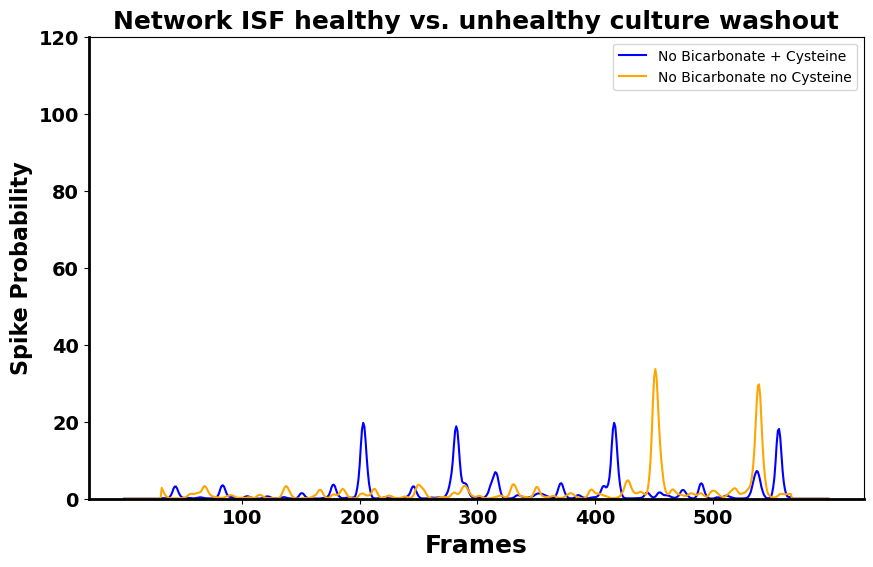

In [24]:
#Calculate sum for each frame (per Well) and plotting it into NISF via T (frames)
#Graph 6

import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv(r"C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_wash\predictions_deltaF_nb_c_1.csv")
data2 = pd.read_csv(r"C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_wash\predictions_deltaF_nb_nc_1.csv")


# Concatenate the dataframes vertically (make sure they have the same columns)
all_data = pd.concat([data], axis=0)
all_data2 = pd.concat([data2], axis=0)

# Calculate the sum of each column across all concatenated DataFrames
total_column_sums = all_data.sum()
total_column_sums2 = all_data2.sum()

# Display the sums for each column
print(total_column_sums)

plt.figure(figsize=(10, 6))  # Set the figure size (optional)
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
total_column_sums2.plot(kind='line', linestyle='-', color='orange')  # Create a line plot
plt.title('Network ISF healthy vs. unhealthy culture washout', fontweight='bold', fontsize=18)  # Title of the plot
plt.xlabel('Frames', fontweight='bold', fontsize=18)  # X-axis label
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Spike Probability', fontweight='bold', fontsize=16)  # Y-axis label
plt.ylim([0, 120])
plt.yticks(fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.legend(['No Bicarbonate + Cysteine', 'No Bicarbonate no Cysteine'])
plt.show()



In [ ]:
#Network ISF
def check_for_csv_files(path):
    csv_files = [file for file in os.listdir(path) if file.endswith(('.csv'))]
    return csv_files

def plot_network_activity_per_well(base_dir, input_path):
    data = pd.read_csv(base_dir + "/" + input_path)
    save_name = os.path.splitext(input_path)[0]

    all_data = pd.concat([data], axis=0)
    total_column_sums = all_data.sum()
    average = total_column_sums.mean()

    plt.figure(figsize=(10, 6))  # Set the figure size (optional)
    total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
    plt.plot(total_column_sums.index, [average] * len(total_column_sums), linestyle=':', color='red', label='Average')

    plt.title(f'Network ISF {save_name}', fontweight='bold', fontsize=18)  # Title of the plot
    plt.xlabel('Frames (10 frames = 1 second)', fontweight='bold', fontsize=18)  # X-axis label
    plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
    plt.ylabel('Summed Spike Probability\nper frame', fontweight='bold', fontsize=16)  # Y-axis label
    plt.yticks(fontweight='bold', fontsize=14)
    plt.ylim([0, 120])
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
    plt.legend(['Summed Probability', 'Average'])
    plt.savefig(base_dir + "/" + save_name + ".png")
    plt.close()
    
base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_HA'
for files in check_for_csv_files(base_dir):
    plot_network_activity_per_well(base_dir, files)

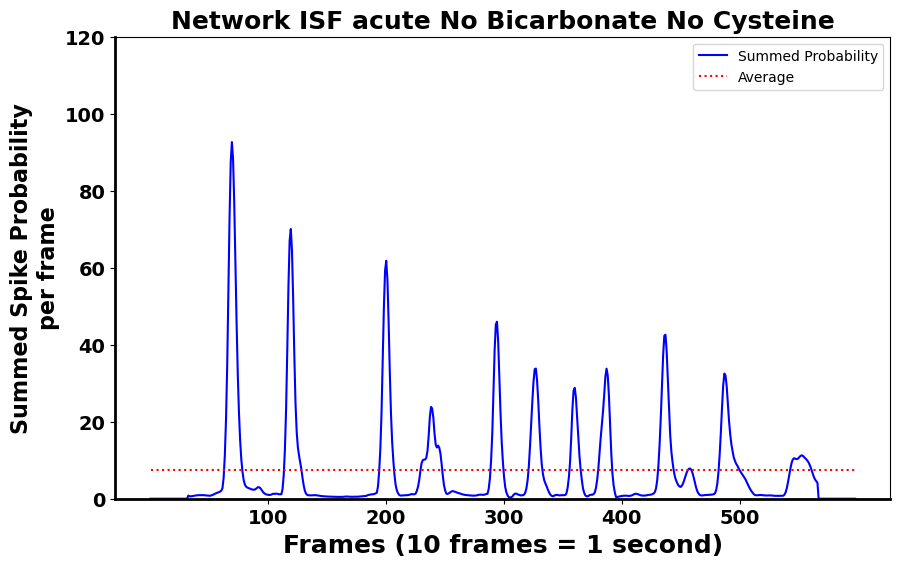

In [41]:
#Network ISF


data = pd.read_csv(r"C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bicarbonate_acute\predictions_deltaF_nbic_ncys_1.csv")

all_data = pd.concat([data], axis=0)
total_column_sums = all_data.sum()
average = total_column_sums.mean()

plt.figure(figsize=(10, 6))  # Set the figure size (optional)
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
plt.plot(total_column_sums.index, [average] * len(total_column_sums), linestyle=':', color='red', label='Average')

plt.title('Network ISF acute No Bicarbonate No Cysteine', fontweight='bold', fontsize=18)  # Title of the plot
plt.xlabel('Frames (10 frames = 1 second)', fontweight='bold', fontsize=18)  # X-axis label
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Summed Spike Probability\nper frame', fontweight='bold', fontsize=16)  # Y-axis label
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim([0, 120])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.legend(['Summed Probability', 'Average'])
plt.show()

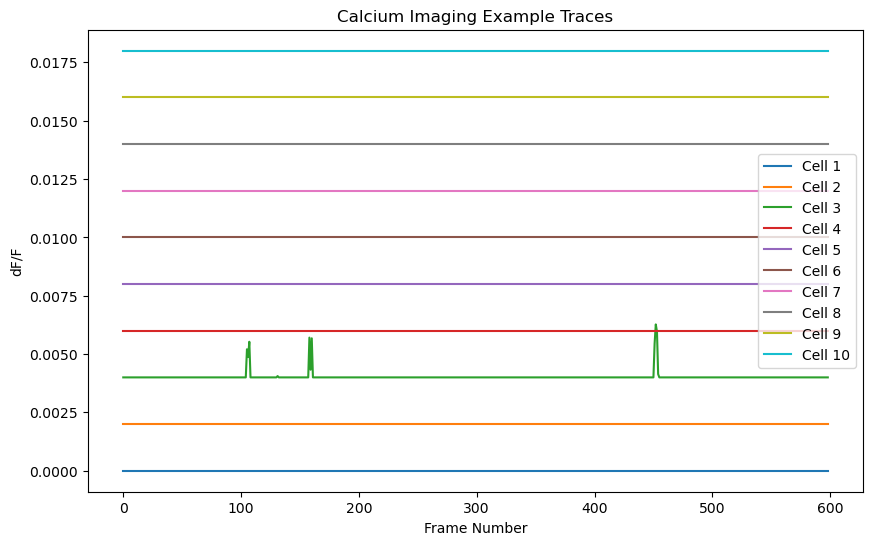

In [200]:
# Plt Prediction traces as a function try 1
def plot_prediction_traces(data, offset=0.002):
    """
    Plots each row of the data on a separate y-offset.
    Args:
    - data: 2D numpy array, where each row is a trace to plot
    - offset: The offset to apply between each trace
    """
    plt.figure(figsize=(10, 6))

    # Plot each trace, offsetting each by a constant amount
    for i, trace in enumerate(data):
        plt.plot(trace + i * offset, label=f'Cell {i+1}')

    plt.xlabel('Frame Number')
    plt.ylabel('dF/F')
    plt.title('Calcium Imaging Example Traces')
    plt.legend()
    plt.show()

# Call the function to plot the traces
sample = data.sample(n=10, random_state=42)

plot_prediction_traces(sample.values)



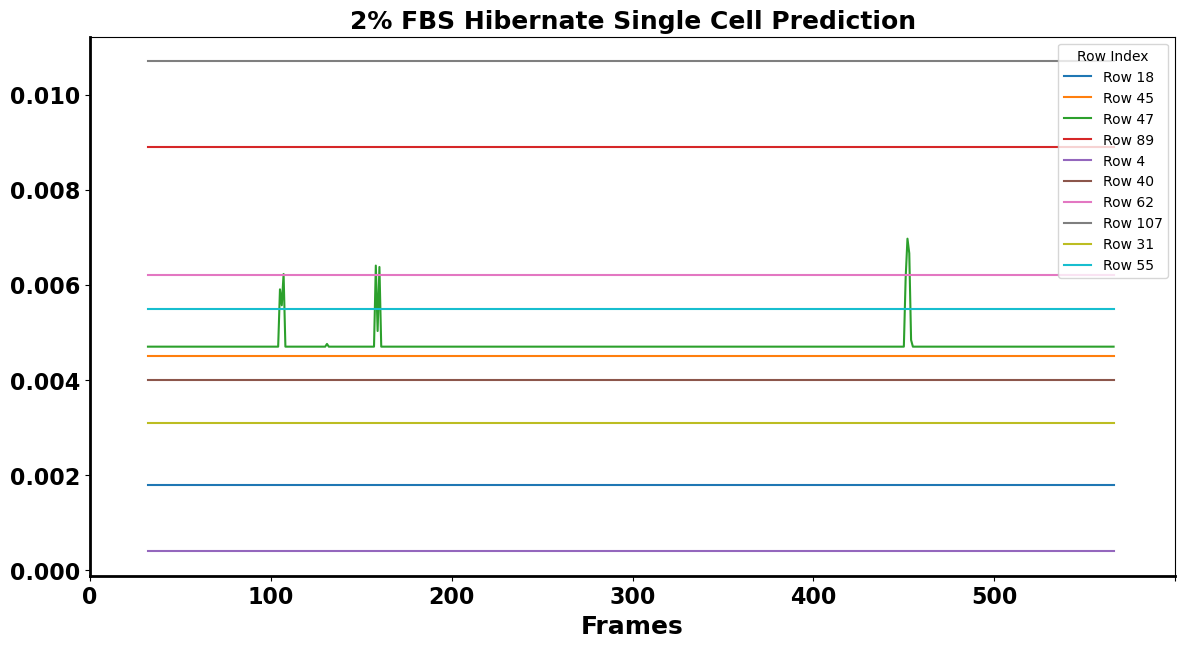

In [ ]:
def plot_traces(file_path, num_samples = 10, random_state = 42, offset=0.0001):
    """
    Plots each row of the data on a separate y-offset.
    Args:
    - data: 2D numpy array, where each row is a trace to plot
    - offset: The offset to apply between each trace
    """

    data = pd.read_csv(file_path)
    random_rows = data.sample(n=num_samples, random_state=random_state)
    plt.figure(figsize=(14,7))

    # Plot each trace, offsetting each by a constant amount

    
    for index, row in random_rows.iterrows():
        plt.plot(row.index, row.values + index * offset, linestyle='-', label=f'Row {index}')
    
    plt.title('2% FBS Hibernate Single Cell Prediction', fontweight='bold', fontsize=18)
    plt.xlabel('Frames', fontweight='bold', fontsize=18)
    plt.xticks([0, 100, 200, 300, 400, 500, 600], fontweight='bold', fontsize=16)
    plt.yticks(fontweight='bold', fontsize=16)

    # Customize axis appearance
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis

    plt.legend(title='Row Index')
    plt.show()

plot_traces(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_1.csv')

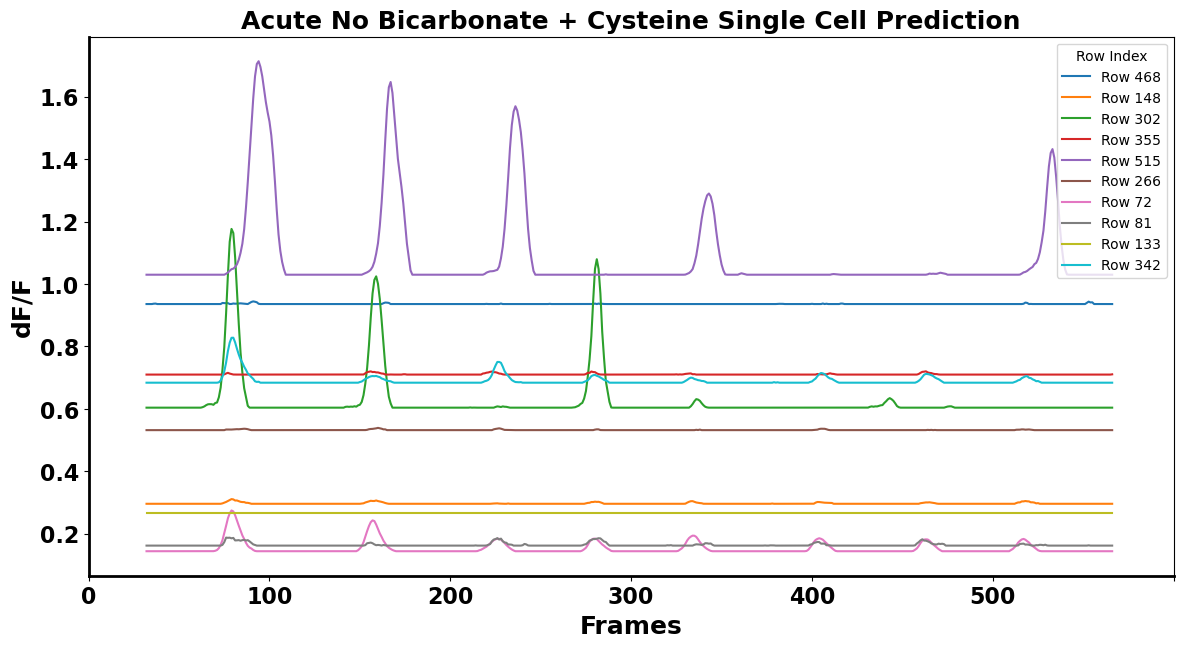

In [149]:
#Single Cell ISF for one condition -> use predictons file
#Neuron 44

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bicarbonate_acute\predictions_deltaF_nbic_cys_1.csv')

# List of row indices to extract
#row_indices = [10,15,18,33,26,44,58,63,75,97]
#average_values = [data.iloc[[row_index]].mean().mean() for row_index in row_indices]

# Randomly select 10 rows from the DataFrame
random_rows = data.sample(n=10, random_state=42)  # 'random_state' for reproducibility

plt.figure(figsize=(14, 7))

# You can plot each row as a separate line in a line plot
offset = 0.002

for index, row in random_rows.iterrows():
    plt.plot(row.index, row.values + index * offset, linestyle='-', label=f'Row {index}') #marker='o' just row_values for displaying it without offset
plt.title('Acute No Bicarbonate + Cysteine Single Cell Prediction', fontweight='bold', fontsize=18)
plt.xlabel('Frames', fontweight='bold', fontsize=18)
plt.xticks([0, 100, 200, 300, 400, 500, 600], fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=16)
#plt.ylim([0, 1.6])
plt.ylabel('dF/F', fontweight='bold', fontsize=18)
plt.legend(title='Row Index')
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.show()


#we want to set y axis to 1_10 (fixed scale bar) for each cell as a like cell count value and right next to graph a separate scale bar 
#maybe the distance between the graphs is too wide, especially on the top

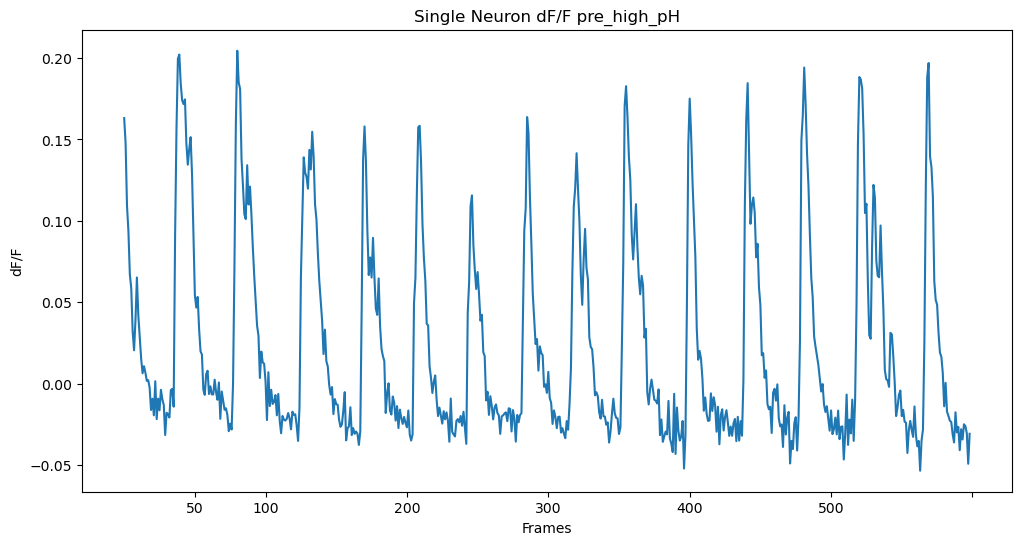

In [42]:
#deltaF Single Cell -> use delta F file
#Neuron 44 high_pH

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_high_pH_Well3.csv')

# Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-')  # Line plot
    plt.title('Single Neuron dF/F pre_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('dF/F')
     # Set specific y-axis ticks
    plt.xticks([100, 200, 300, 400, 500, 600])


    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

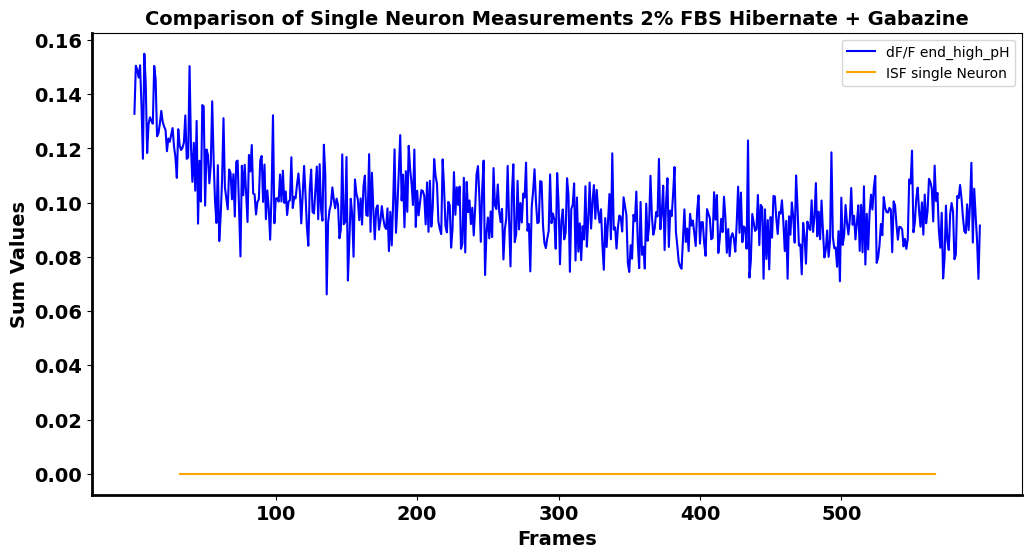

In [78]:
#Plotting dF/F and ISF together just like CASCADE Figure
#Graph 6

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data1 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_deltaF_files\deltaF_2F_G_3.csv")
data2 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_3.csv")

# Check if the specified row index exists in both DataFrames
if 44 < len(data1) and 44 < len(data2):
    # Extract the specific row (row 44) from both DataFrames
    row_data1 = data1.iloc[44]
    row_data2 = data2.iloc[44]

    #modified_row_data2 = row_data2.iloc[32:-32]  # This slices the data to exclude the first and last 32 elements
    
    vertical_shift = 0.1  # Adjust this value as needed to shift the blue graph
    #horizontal_shift = 10

    # Create a plot
    plt.figure(figsize=(12, 6))
    
    # Plot data from the first DataFrame
    plt.plot(row_data1.index, row_data1.values + vertical_shift, linestyle='-', color='blue', label='dF/F end_high_pH')
    
    # Plot data from the second DataFrame
    plt.plot(row_data2.index, row_data2.values, linestyle='-', color='orange', label='ISF single Neuron')
    
    # Title and labels
    plt.title('Comparison of Single Neuron Measurements 2% FBS Hibernate + Gabazine', fontweight='bold', fontsize=14)
    plt.xlabel('Frames', fontsize=14)
    plt.ylabel('Measurement', fontsize=14)
    plt.xticks([100, 200, 300, 400, 500], fontweight='bold',fontsize=14)
    plt.xlabel('Frames', fontweight='bold',fontsize=14)
    plt.ylabel('Sum Values', fontweight='bold', fontsize=14)
    #plt.ylim([-0.1, 0.200])
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
    plt.yticks(fontweight='bold', fontsize=14)
    
    # Show legend
    plt.legend()

    plt.show()
else:
    print(f"Row 44 does not exist in one or both DataFrames. Data1 has {len(data1)} rows, Data2 has {len(data2)} rows.")

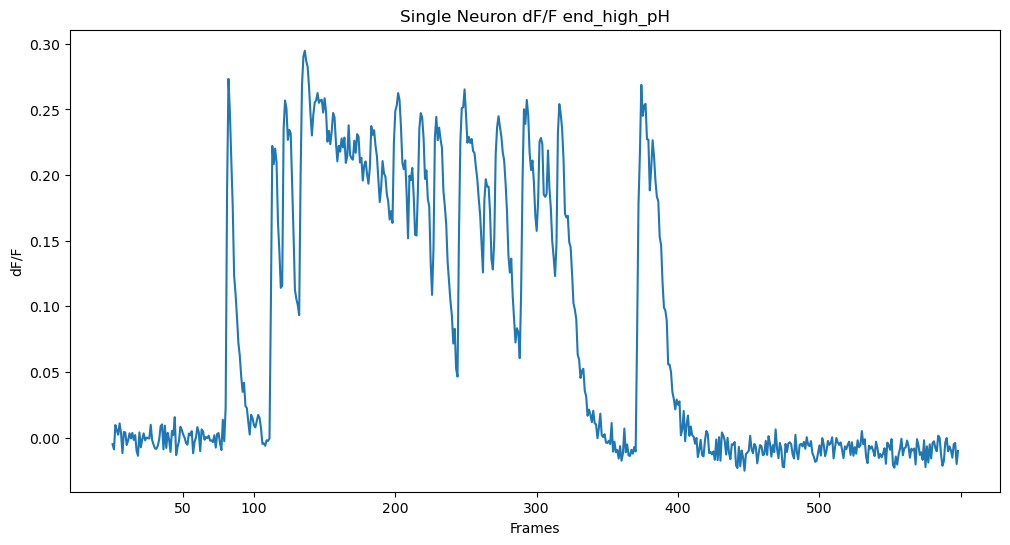

In [83]:
#deltaF Single Cell use deltaF file
#Neuron 44 normal_pH

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_end_high_pH_well003.csv')

# Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-')  # Line plot
    plt.title('Single Neuron dF/F end_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('dF/F')
     # Set specific y-axis ticks
    plt.xticks([100, 200, 300, 400, 500, 600])


    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

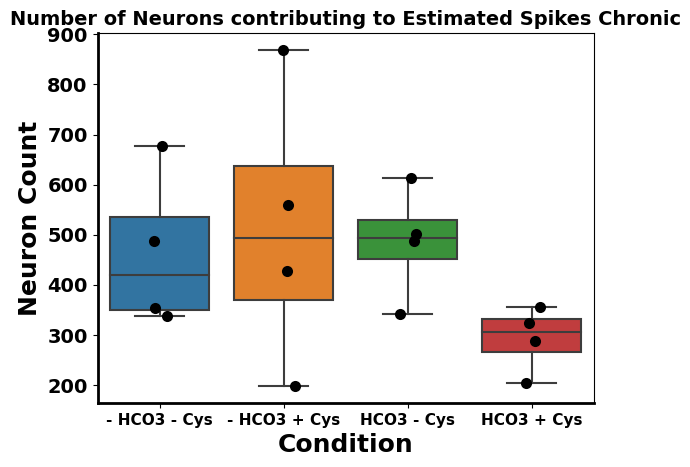

In [10]:
#How many cells do fire for Estim. Spikes Graph
#use overview file

data = pd.read_csv(r"C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\overview.csv")

data = {
    'Condition': [ '- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 - Cys','- HCO3 + Cys', '- HCO3 + Cys', '- HCO3 + Cys',
                   '- HCO3 + Cys','HCO3 - Cys','HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'],
    'Value': [677, 487, 337, 354, 869, 560, 428, 198, 614, 501, 487, 342, 355, 324, 287, 203]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()
plt.title('Number of Neurons contributing to Estimated Spikes Chronic', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Neuron Count', fontweight='bold', fontsize=18)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
#plt.ylim([0, 900])
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()

{'Condition': ['- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 + Cys', '- HCO3 + Cys', '- HCO3 + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'], 'Value': [4.7308653846153845, 3.3635055350553507, 3.2745340050377836, 1.159009900990099, 2.0790799031477, 2.766301703163017, 5.792740740740741, 3.2368128654970763, 6.946947608200456, 9.225550847457628, 7.3613333333333335, 12.287625, 11.158508064516129]}


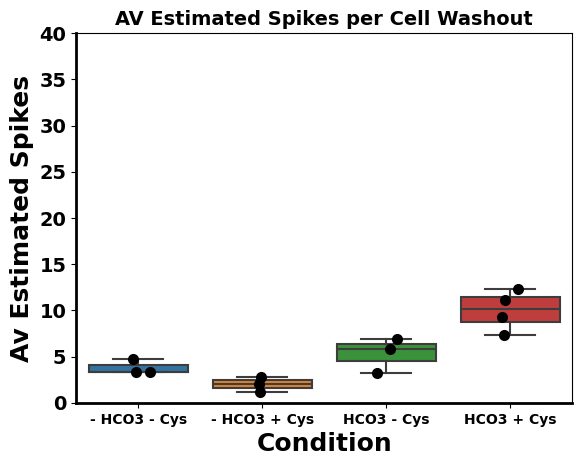

In [53]:
#Graph overall Av/ cells that conducted
#use overview file

data = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\overview.csv")

data = {
    'Condition': [  '- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 + Cys', '- HCO3 + Cys', '- HCO3 + Cys',
                   'HCO3 - Cys','HCO3 - Cys','HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'],
    'Value': [984.02/208, 911.51/271, 1299.99/397, 819.42/707, 858.66/413, 1136.95/411, 1564.04/270, 1106.99/342, 3049.71/439, 2177.23/236, 1545.88/210, 1966.02/160, 2767.31/248]
}

print(data)

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('AV Estimated Spikes per Cell Washout', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Av Estimated Spikes', fontweight='bold', fontsize=18)
plt.ylim([0, 40])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=10)
plt.show()

In [35]:
#CV for single cell Av and how that fluctuates, well Cv in graph
#what is every cell contibuting to cv
#CV_ISF

data = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Hiber_1.csv")
data2 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Hiber_2.csv")
data3 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_1.csv")
data4 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_2.csv")

data['average'] = data.apply(lambda row: row.mean(), axis=1)
data['std_dev'] = data.apply(lambda row: row.std(), axis=1)
data2['average'] = data2.apply(lambda row: row.mean(), axis=1)
data2['std_dev'] = data2.apply(lambda row: row.std(), axis=1)
data3['average'] = data3.apply(lambda row: row.mean(), axis=1)
data3['std_dev'] = data3.apply(lambda row: row.std(), axis=1)
data4['average'] = data4.apply(lambda row: row.mean(), axis=1)
data4['std_dev'] = data4.apply(lambda row: row.std(), axis=1)

overall_average = df['average'].mean()
overall_std_dev = df['std_dev'].std()
overall_average2 = df['average'].mean()
overall_std_dev2 = df['std_dev'].std()
overall_average3 = df['average'].mean()
overall_std_dev3 = df['std_dev'].std()
overall_average4 = df['average'].mean()
overall_std_dev4 = df['std_dev'].std()

overall_ratio = overall_std_dev / overall_average
overall_ratio2 = overall_std_dev2 / overall_average2
overall_ratio3 = overall_std_dev3 / overall_average3
overall_ratio4 = overall_std_dev4 / overall_average4

print(overall_ratio)
print(overall_ratio2)
print(overall_ratio3)
print(overall_ratio4)

data = {
    'Condition': ['1% FBS Hibernate', '1% FBS Hibernate'],
    'Value': [8.769543534820603, 8.769543534820603]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()
plt.title('Overall Ratio of Standard Deviation to Average')
plt.xlabel('Row Index')
plt.ylabel('Overall Ratio')
plt.show()


KeyError: 'average'

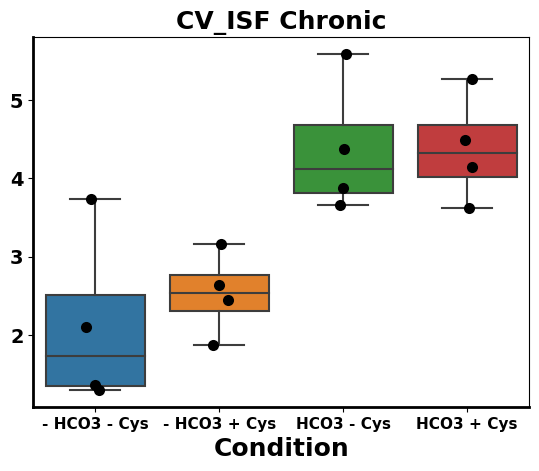

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic/predictions_deltaF_nb_nc_1.csv')
data2 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic/predictions_deltaF_nb_nc_2.csv')
data3 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic/predictions_deltaF_nb_nc_3.csv')
data4 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic\predictions_deltaF_nb_nc_4.csv')
data5 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic\predictions_deltaF_nb_c_1.csv')
data6 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic\predictions_deltaF_nb_c_2.csv')
data7 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic\predictions_deltaF_nb_c_3.csv')
data8 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_chronic\predictions_deltaF_nb_c_4.csv')

data9 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic/predictions_deltaF_b_nc_1.csv')
data10 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_nc_2.csv')
data11 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_nc_3.csv')
data12 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_nc_4.csv')
data13 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_c_1.csv')
data14 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_c_2.csv')
data15 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_c_3.csv')
data16 = pd.read_csv(r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic\predictions_deltaF_b_c_4.csv')

dataframes = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16]
ratios = []
conditions = ['- HCO3 - Cys', '- HCO3 - Cys','- HCO3 - Cys', '- HCO3 - Cys', '- HCO3 + Cys', '- HCO3 + Cys', '- HCO3 + Cys','- HCO3 + Cys',
                   'HCO3 - Cys', 'HCO3 - Cys','HCO3 - Cys','HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys','HCO3 + Cys']

for df in dataframes:
    df['average'] = df.apply(lambda row: row.mean(), axis=1)
    df['std_dev'] = df.apply(lambda row: row.std(), axis=1)
    overall_average = df['average'].mean()
    overall_std_dev = df['std_dev'].mean()
    overall_ratio = overall_std_dev / overall_average
    ratios.append(overall_ratio)

df = pd.DataFrame({'Value': ratios, 'Condition': conditions})

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
plt.title('CV_ISF Chronic', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontsize=18, fontweight='bold')
#plt.ylabel('Overall Ratio', fontsize=18, fontweight='bold')
plt.ylabel('')
#plt.ylim([0, 5])
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()

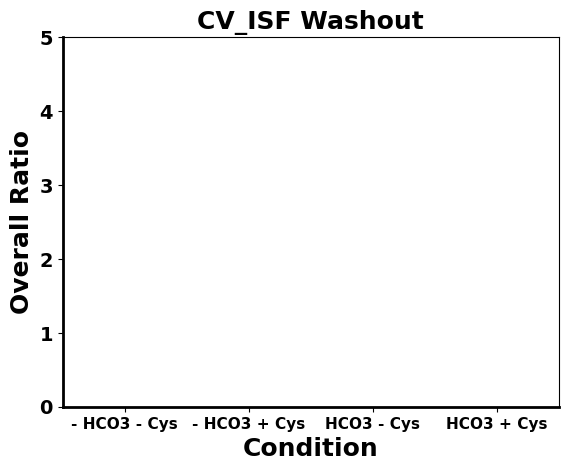

In [164]:
base_dir = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

file_names = [
    'no_bic_wash/predictions_deltaF_nb_nc_2.csv',
    'no_bic_wash/predictions_deltaF_nb_nc_3.csv',
    'no_bic_wash/predictions_deltaF_nb_nc_1.csv',
    'no_bic_wash/predictions_deltaF_nb_c_1.csv',
    'no_bic_wash/predictions_deltaF_nb_c_2.csv',
    'no_bic_wash/predictions_deltaF_nb_c_3.csv',
    'bic_wash/predictions_deltaF_b_nc_2.csv',
    'bic_wash/predictions_deltaF_b_nc_3.csv',
    'bic_wash/predictions_deltaF_b_nc_4.csv',
    'bic_wash/predictions_deltaF_b_c_1.csv',
    'bic_wash/predictions_deltaF_b_c_3.csv',
    'bic_wash/predictions_deltaF_b_c_3.csv',
    'bic_wash/predictions_deltaF_b_c_4.csv'
]

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

def process_data(data):
    combined_values = []
    conditions = []

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = '- HCO3 - Cys'
        elif i < 6:
            condition = '- HCO3 + Cys'
        elif i < 9:
            condition = 'HCO3 - Cys'
        else:
            condition = 'HCO3 + Cys'
        conditions.append(condition)
    return combined_values, conditions


def create_boxplot(combined_values, conditions):
    data = {'Value': combined_values, 'Condition': conditions}
    df = pd.DataFrame(data)

    sns.boxplot(x='Condition', y='Value', data=df)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
    plt.title('CV_ISF Washout', fontsize=18, fontweight='bold')
    plt.xlabel('Condition', fontsize=18, fontweight='bold')
    plt.ylabel('Overall Ratio', fontsize=18, fontweight='bold')
    plt.ylim([0, 5])
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.yticks(fontweight='bold', fontsize=14)
    plt.xticks(fontweight='bold', fontsize=11)
    plt.show()

if __name__ == '__main__':
    data = read_files(base_dir, file_names)
    combined_values, conditions = process_data(data)
    create_boxplot(combined_values, conditions)